# Geoffrey Gund

In [ ]:
#%% specifying data location data from gitHub, preparing data

import os
import xlrd
#folderData="https://raw.githubusercontent.com/geeoffgoond/project/master/"
folderData="https://rawgit.com/geeoffgoond/psrcdata/master/"
fileXL=os.path.join(folderData,"2015-pr1-hhsurvey-household.xlsx")

# importing data into pandas
import pandas as pd

psrchh=pd.read_excel(fileXL)

In [129]:
#%% limiting columns and data to what we need

psrchh=psrchh[["hhid", "hhnumtrips", "hh_income_detailed", "h_zip", "h_city", "res_factors_hhchange", "res_factors_afford", "res_factors_school", "res_factors_walk", "res_factors_space", "res_factors_closefam", "res_factors_transit", "res_factors_hwy", "res_factors_30min", "prev_home_loc_zip", "prev_home_loc_city", "prev_home_loc_st"]]

WASzip=psrchh[psrchh.prev_home_loc_st=='WA']

WASzip.reset_index(inplace=True,drop=True) # resetting the index -- good practice

#As the cells have integers, I am confident to use comparisons:
WASzip=WASzip[(WASzip.prev_home_loc_zip <=99403) & (WASzip.prev_home_loc_zip>=98001)]

#dropping na
WASzip.dropna(axis=0,inplace=True)

In [130]:
WASzip.reset_index(inplace=True,drop=True) #resetting the index again

In [85]:
numericColumns =["hhnumtrips", "hh_income_detailed", "res_factors_hhchange", "res_factors_afford", "res_factors_school", "res_factors_walk", "res_factors_space", "res_factors_closefam", "res_factors_transit", "res_factors_hwy", "res_factors_30min"]
aggregateBY=['prev_home_loc_zip']

#'as_index = False' avoids that the column of zip codes becomes a row name: 
WA_zip_psrchh=WASzip.groupby (aggregateBY, as_index = False)[numericColumns].mean()

#see result:
WA_zip_psrchh.head()

,prev_home_loc_zip,hhnumtrips,hh_income_detailed,res_factors_hhchange,res_factors_afford,res_factors_school,res_factors_walk,res_factors_space,res_factors_closefam,res_factors_transit,res_factors_hwy,res_factors_30min
0,98002.0,9.000000,2.333333,1.666667,5.000000,3.000000,4.666667,3.666667,2.333333,5.000000,2.000000,4.000000
1,98003.0,6.000000,3.571429,2.428571,4.428571,2.285714,4.000000,3.714286,3.285714,3.428571,3.428571,3.571429
2,98004.0,4.833333,37.583333,2.916667,3.750000,2.333333,4.250000,3.166667,3.083333,3.333333,3.250000,3.333333
3,98005.0,9.000000,9.000000,2.500000,2.500000,2.500000,2.000000,4.500000,2.500000,2.500000,2.500000,4.500000
4,98006.0,9.666667,6.500000,3.166667,3.666667,3.000000,3.833333,3.333333,3.000000,2.500000,4.000000,3.333333


In [135]:
psrchh['hh_income_detailed'].describe()

count    2419.000000
mean       15.104589
std        28.664127
min         1.000000
25%         4.000000
50%         6.000000
75%         7.000000
max        98.000000
Name: hh_income_detailed, dtype: float64

In [138]:
psrchh['hhnumtrips'].describe()

count    2419.000000
mean        7.735014
std         5.891462
min         0.000000
25%         4.000000
50%         6.000000
75%        10.000000
max        62.000000
Name: hhnumtrips, dtype: float64

In [ ]:
#%%Simplify data by finding most impactful variable in decision to move in each zip code



In [136]:
import numpy as np  #numpy manages the nan for pandas
symbolsForNA=[98]
psrchh['hh_income_detailed'].replace(symbolsForNA,np.nan,inplace=True) #replacing missing values

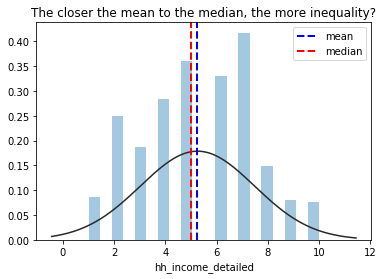

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt # needed for more customization
from scipy.stats import norm
#statistics:
mnVar=psrchh['hh_income_detailed'].mean()
mdVar=psrchh['hh_income_detailed'].median()

sns.distplot(psrchh['hh_income_detailed'].dropna(),kde=False,fit=norm)
plt.title('Income Distribution')
plt.axvline(mnVar, color='b', linestyle='dashed', linewidth=2,label='mean')
plt.axvline(mdVar, color='r', linestyle='dashed', linewidth=2,label='median')
plt.legend() #I should update this to include more info

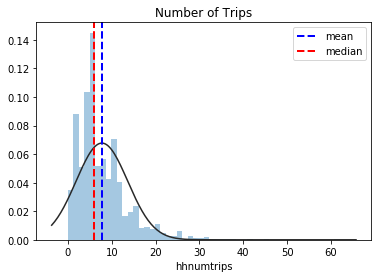

In [139]:
#plotting data
#import seaborn as sns
#from scipy.stats import norm
#import matplotlib.pyplot as plt # needed for more customization
%matplotlib inline

#plotting with mean and median:
mnVar=psrchh['hhnumtrips'].mean()
mdVar=psrchh['hhnumtrips'].median()

sns.distplot(psrchh['hhnumtrips'].dropna(),kde=False,fit=norm)
plt.title('Number of Trips')
plt.axvline(mnVar, color='b', linestyle='dashed', linewidth=2,label='mean')
plt.axvline(mdVar, color='r', linestyle='dashed', linewidth=2,label='median')
plt.legend()
plt.show()

In [86]:
#New Map
numericColumns =["hhnumtrips", "hh_income_detailed", "res_factors_hhchange", "res_factors_afford", "res_factors_school", "res_factors_walk", "res_factors_space", "res_factors_closefam", "res_factors_transit", "res_factors_hwy", "res_factors_30min"]
aggregateBY=['h_zip']

#'as_index = False' avoids that the column of zip codes becomes a row name: 
WA_hzip_psrchh=WASzip.groupby (aggregateBY, as_index = False)[numericColumns].mean()

#see result:
WA_hzip_psrchh.head()

,h_zip,hhnumtrips,hh_income_detailed,res_factors_hhchange,res_factors_afford,res_factors_school,res_factors_walk,res_factors_space,res_factors_closefam,res_factors_transit,res_factors_hwy,res_factors_30min
0,98001,2.000000,8.000000,4.000000,5.000000,3.000000,4.000000,3.000000,5.000000,4.000000,5.000000,5.000000
1,98002,6.500000,4.250000,3.250000,4.000000,2.750000,3.250000,3.500000,2.750000,3.250000,2.500000,3.000000
2,98003,4.333333,66.000000,2.333333,4.333333,2.333333,3.000000,3.333333,3.000000,2.666667,3.333333,2.666667
3,98004,4.500000,23.333333,2.666667,3.500000,2.833333,4.666667,3.166667,3.666667,3.166667,4.000000,3.500000
4,98005,20.000000,98.000000,5.000000,4.000000,5.000000,5.000000,5.000000,3.000000,3.000000,3.000000,5.000000


In [171]:
#%% lets work on getting that map
compressedMap=os.path.join(folderData,'WaZipsMap.zip')
#compressedMap= 'https://github.com/EvansDataScience/data/raw/master/WAzips.zip'

import geopandas as gpd

wazipMap = gpd.GeoDataFrame.from_file(compressedMap)
#wazipMap1 = gpd.GeoDataFrame.from_file(compressedMap)

wazipMap1.head()

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry
0,21914,8600000US21914,21914,1924479,477175,"POLYGON ((-75.99444799999999 39.567742, -75.99..."
1,01001,8600000US01001,01001,29731610,2118827,"POLYGON ((-72.667677 42.045022, -72.657715 42...."
2,34736,8600000US34736,34736,322808220,78588518,"(POLYGON ((-81.806163 28.568643, -81.801577999..."
3,46151,8600000US46151,46151,530632048,9804480,"(POLYGON ((-86.398562 39.320829, -86.398125999..."
4,48039,8600000US48039,48039,59592687,4845242,"POLYGON ((-82.61060000000001 42.724669, -82.51..."


In [106]:
wazipMap.ZCTA5CE10.dtype

dtype('O')

In [107]:
WA_hzip_psrchh.h_zip.dtype

dtype('int64')

In [172]:
wazipMap.ZCTA5CE10=wazipMap.ZCTA5CE10.astype(int) #setting to int
WA_zip_psrchh.prev_home_loc_zip=WA_zip_psrchh.prev_home_loc_zip.astype(int) #setting to int


In [140]:
#%% restrict zips list because we want to restrict this to the Puget Sound region
fileZips=os.path.join(folderData,"waStateZips.xlsx")
waStateZips=pd.read_excel(fileZips)


In [186]:
#set the counties we are interested in
PugetSoundCounties = ["KING", "KITSAP", "PIERCE", "SNOHOMISH", "ISLANDS"] #can change
PugetSoundZips = waStateZips[(waStateZips['County Name']).isin(PugetSoundCounties)] #creates a dataFrame of data from those counties
#PugetSoundZips #see the dataFrame to verify (if we'd like)
PugetSoundZips = PugetSoundZips.zip #set it to just a list of the zips
PugetSoundZips

148    98001
149    98002
150    98071
151    98092
152    98004
153    98005
154    98006
155    98007
156    98008
157    98009
158    98015
159    98010
160    98011
161    98041
162    98013
163    98014
164    98019
165    98022
166    98024
167    98003
168    98023
169    98063
170    98093
171    98025
172    98027
173    98029
174    98028
175    98030
176    98031
177    98032
       ...  
502    98201
503    98203
504    98204
505    98205
506    98206
507    98207
508    98208
509    98213
510    98251
511    98252
512    98256
513    98258
514    98036
515    98037
516    98046
517    98087
518    98270
519    98271
520    98082
521    98272
522    98043
523    98275
524    98259
525    98287
526    98290
527    98291
528    98296
529    98292
530    98293
531    98294
Name: zip, Length: 252, dtype: object

In [181]:
#wazipMap=wazipMap[(wazipMap.ZCTA5CE10 <=99403) & (wazipMap.ZCTA5CE10>=98001)] #restricts map just to waState
wazipMap=wazipMap[(wazipMap.ZCTA5CE10.isin(PugetSoundZips))] #restricts map to just those counties we specified

In [182]:
#setting other map to int
wazipMap1.ZCTA5CE10=wazipMap.ZCTA5CE10.astype(int) #creating second mpa
WA_hzip_psrchh.h_zip=WA_hzip_psrchh.h_zip.astype(int) #setting to int

In [183]:
psrchhWAprevmap=wazipMap.merge(WA_zip_psrchh, left_on='ZCTA5CE10', right_on='prev_home_loc_zip') ## merging data into shapefile

In [184]:
psrchhWAnewmap=wazipMap1.merge(WA_hzip_psrchh, left_on='ZCTA5CE10', right_on='h_zip') ## merging data into shapefile

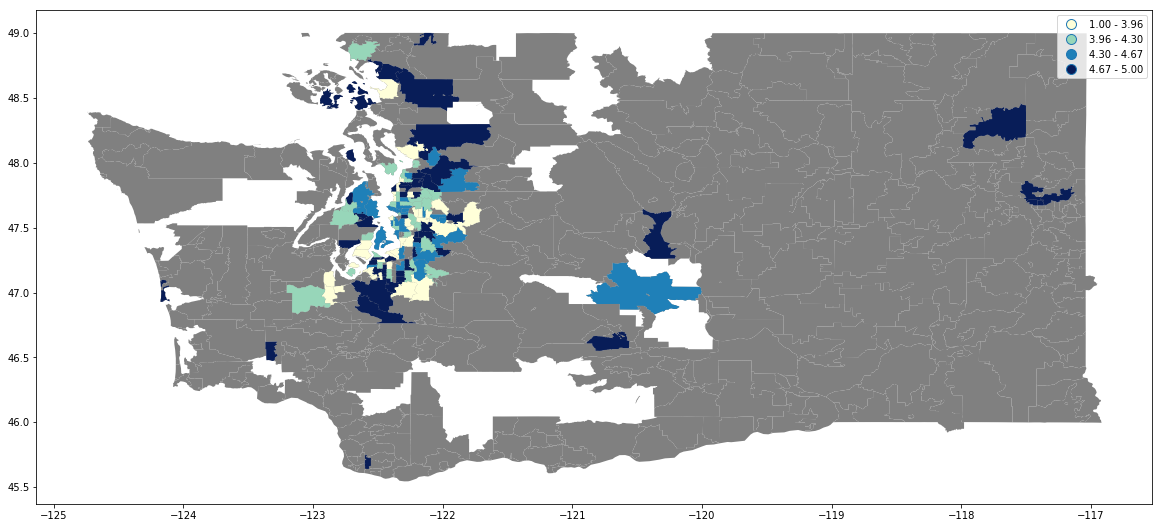

In [177]:
%matplotlib inline
base = wazipMap.plot(color='grey',figsize=(20,13))

#psrchhWAmap.plot(ax=base, color='pink')
psrchhWAprevmap.plot(ax=base,column='res_factors_afford', cmap='YlGnBu', scheme='Quantiles', k=5, legend=True) #affordability

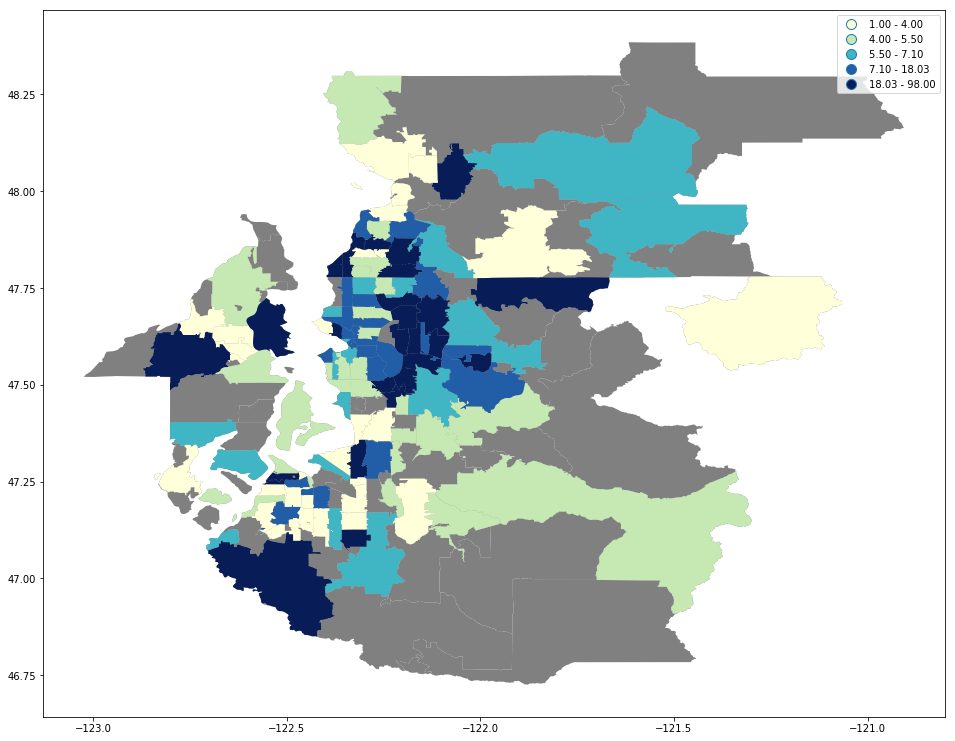

In [185]:
%matplotlib inline
base = wazipMap.plot(color='grey',figsize=(20,13))

#psrchhWAmap.plot(ax=base, color='pink')
psrchhWAnewmap.plot(ax=base,column='hh_income_detailed', cmap='YlGnBu', scheme='Quantiles', k=5, legend=True) #household income
#psrchhWAnewmap.plot(ax=base,column='hhnumtrips', cmap='YlGnBu', scheme='Quantiles', k=5, legend=True) #number of trips

In [121]:
%matplotlib inline
psrchhWAnewmap.plot(ax=base,column='hhnumtrips', cmap='YlGnBu', scheme='Quantiles', k=5, legend=True) #affordability

In [114]:
%matplotlib inline
psrchhWAnewmap.plot(ax=base,column='hhnumtrips', cmap='YlGnBu', scheme='Quantiles', k=5, legend=True) #affordability

In [56]:
#psrchhWAmap['prev_home_loc_zip'].describe()
psrchhWAmap['res_factors_afford'].describe()

count    154.000000
mean       4.293557
std        0.818968
min        1.000000
25%        4.000000
50%        4.500000
75%        5.000000
max        5.000000
Name: res_factors_afford, dtype: float64

In [115]:
%matplotlib inline
#base = wazipMap(color='gray',figsize=(20,13))
psrchhWAmap.plot(ax=base,column='res_factors_afford', cmap='YlGnBu', scheme='Quantiles', k=5, legend=True)